In [1]:
from julia.api import Julia
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)


In [2]:
print(jl.eval('Threads.nthreads()'))
jl.eval('include("time_statistics.jl")')

4


<PyCall.jlwrap time_e_var>

### **1a. Time when varyng A dimentions with random matrix** ###

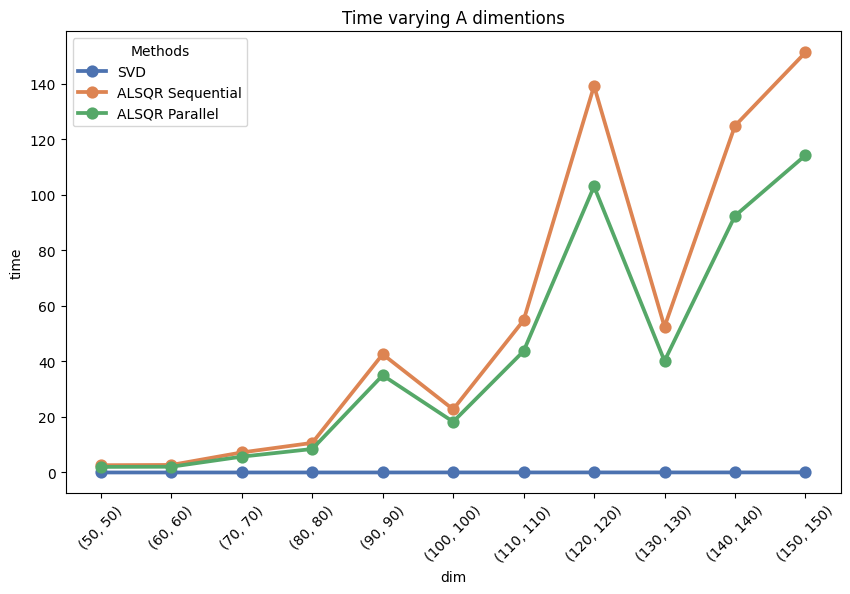

In [3]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
#plt.title("Time varying A dimentions")
plt.show()

### **1b. Time when varyng A dimentions with poorly Hilbert conditioned matrices** ###

In [4]:
# Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_Hilbert_poorly_conditioned()')

# # Convert to DataFrames
# df1 = pd.DataFrame(Svd_time)
# df2 = pd.DataFrame(LSQR_seq)
# df3 = pd.DataFrame(LSQR_par)

# # Add a 'method' column to distinguish the data sources
# df1['Methods'] = 'SVD'
# df2['Methods'] = 'ALSQR Sequential'
# df3['Methods'] = 'ALSQR Parallel'

# # Concatenate the dataframes
# df = pd.concat([df1, df2, df3])

# # Convert 'dim' to string so it can be used as a categorical variable
# df['dim'] = df['dim'].astype(str)

# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
# plt.xticks(rotation=45)
# plt.show()

### **1c. Time when varyng A dimentions with poorly Vandermonde conditioned matrices** ###

In [5]:
# Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_Vandermonde_poorly_conditioned()')

# # Convert to DataFrames
# df1 = pd.DataFrame(Svd_time)
# df2 = pd.DataFrame(LSQR_seq)
# df3 = pd.DataFrame(LSQR_par)

# # Add a 'method' column to distinguish the data sources
# df1['Methods'] = 'SVD'
# df2['Methods'] = 'ALSQR Sequential'
# df3['Methods'] = 'ALSQR Parallel'

# # Concatenate the dataframes
# df = pd.concat([df1, df2, df3])

# # Convert 'dim' to string so it can be used as a categorical variable
# df['dim'] = df['dim'].astype(str)

# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
# plt.xticks(rotation=45)
# plt.show()

### **1. Time when varyng A dimentions square matrices** ###

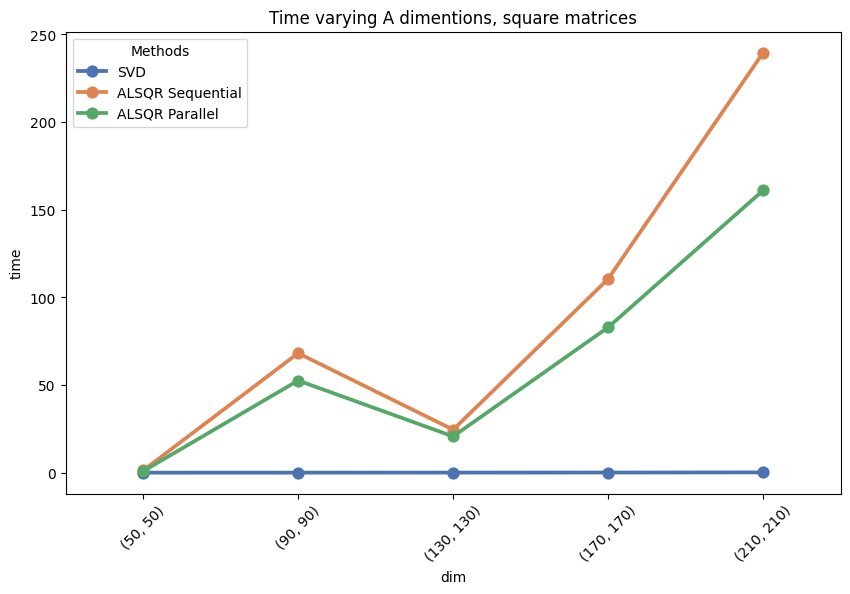

In [6]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_square()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, square matrices")
plt.show()

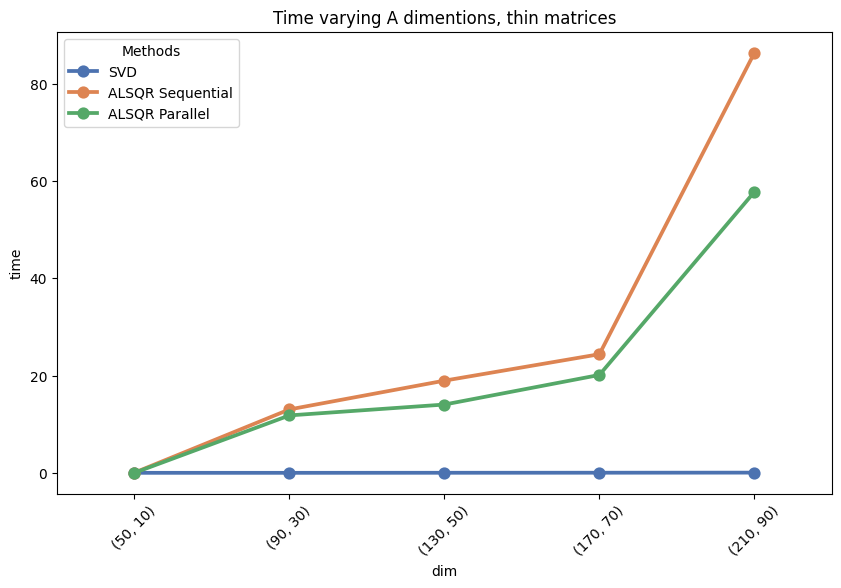

In [7]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_thin()')
# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, thin matrices")
plt.show()

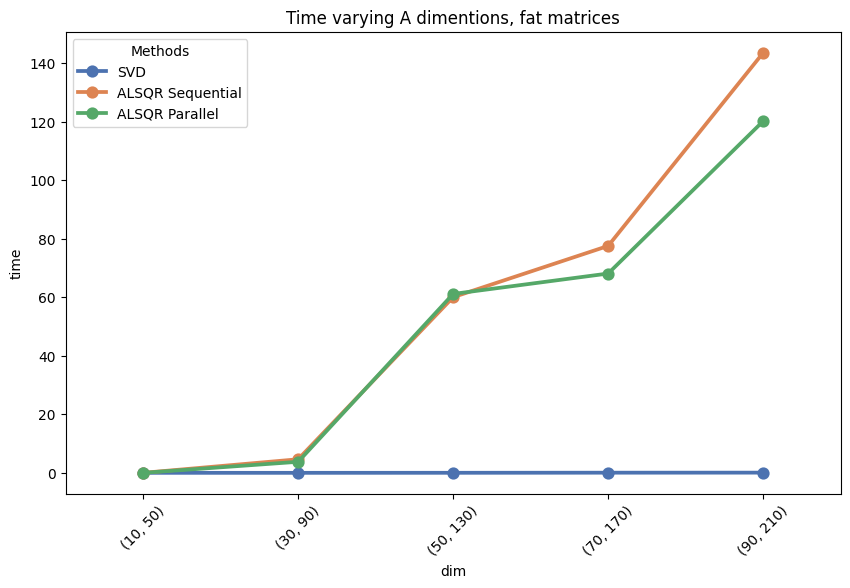

In [8]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_fat()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, fat matrices")
plt.show()

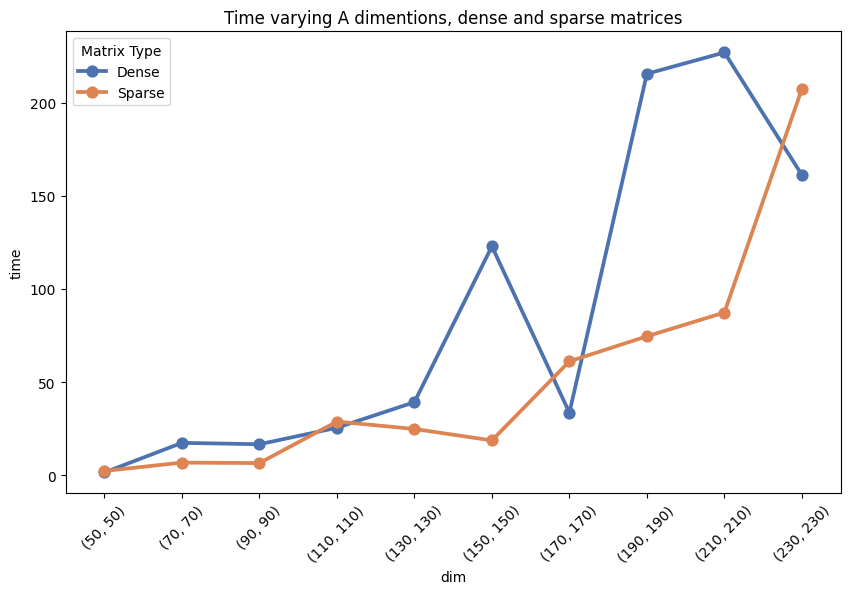

In [9]:
Dense, Sparse = jl.eval('time_A_var_dense_sparse()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Dense)
df2 = pd.DataFrame(Sparse)

# Add a 'method' column to distinguish the data sources
df1['Matrix Type'] = 'Dense'
df2['Matrix Type'] = 'Sparse'


# Concatenate the dataframes
df = pd.concat([df1, df2])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Matrix Type', palette='deep')
plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, dense and sparse matrices")
plt.show()

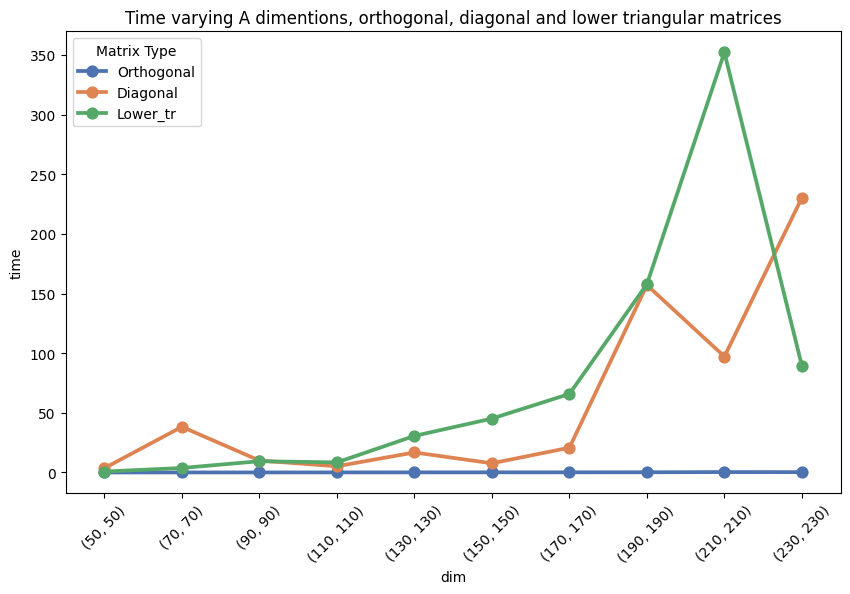

In [10]:
Orthogonal, Diagonal, Lower_tr = jl.eval('time_A_var_orth_diag_lower()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Orthogonal)
df2 = pd.DataFrame(Diagonal)
df3 = pd.DataFrame(Lower_tr)

# Add a 'method' column to distinguish the data sources
df1['Matrix Type'] = 'Orthogonal'
df2['Matrix Type'] = 'Diagonal'
df3['Matrix Type'] = 'Lower_tr'


# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Matrix Type', palette='deep')
plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, orthogonal, diagonal and lower triangular matrices")
plt.show()

### **------------------------------------------------------------------------------------------------** ###

### **2. Time when varying rank k value** ###

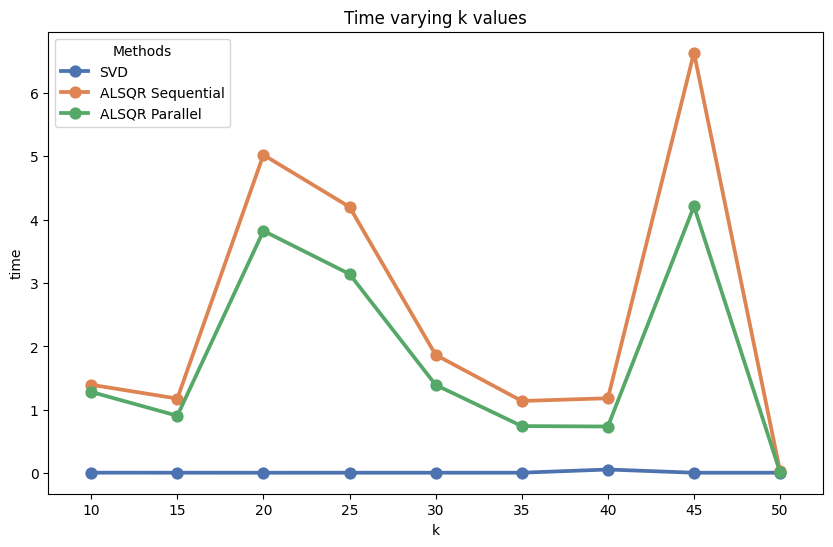

In [3]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_k_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying k values")
plt.show()

### **------------------------------------------------------------------------------------------------** ###

### **3. Time when varying the e value** ### 

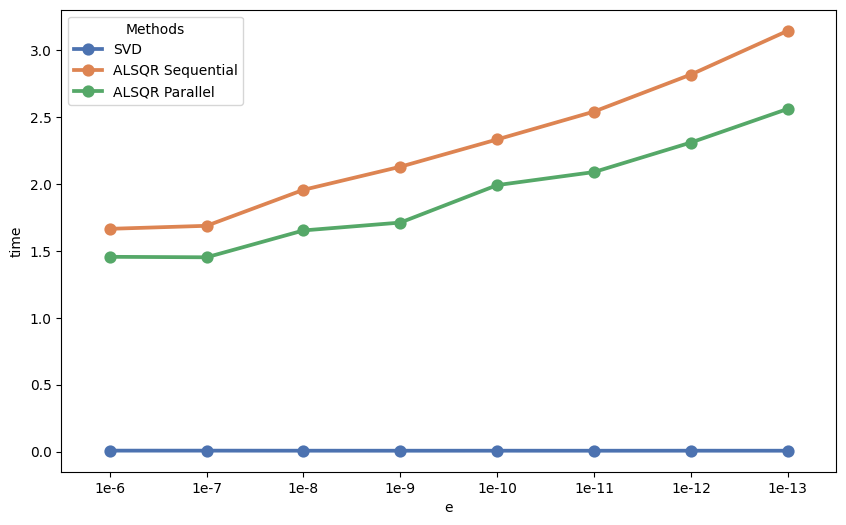

In [3]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_e_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

df['e'] = df['e'].apply(lambda x: f"1e-{int(-np.log10(x))}")

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='e', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying e values")
plt.show()